### Load File

In [36]:
%cd '/content/drive/My Drive/Spotify/dataset/spotify-podcasts-2020/training_dataset'

/content/drive/My Drive/Spotify/dataset/spotify-podcasts-2020/training_dataset


In [37]:
train_file = open('podcasts_2020_train.qrels', 'r') 
samples = train_file.readlines()
print(samples[0])

1	spotify:episode:0E2nqCXMkS218SE72APmNr	240.0	2



In [38]:
for i in samples:
  print(i)

1	spotify:episode:0E2nqCXMkS218SE72APmNr	240.0	2

1	spotify:episode:0E2nqCXMkS218SE72APmNr	300.0	2

1	spotify:episode:0E2nqCXMkS218SE72APmNr	360.0	2

1	spotify:episode:0Th494DvnO5dU8vTi3QHm2	120.0	1

1	spotify:episode:199bOiXL0l4YsRaSNDNXvP	1200.0	2

1	spotify:episode:1ZA1QTtylexrVt75xiprNH	840.0	2

1	spotify:episode:1ZA1QTtylexrVt75xiprNH	900.0	2

1	spotify:episode:1ZA1QTtylexrVt75xiprNH	960.0	2

1	spotify:episode:1ZA1QTtylexrVt75xiprNH	1020.0	2

1	spotify:episode:1ZA1QTtylexrVt75xiprNH	1500.0	2

1	spotify:episode:1o0HCHjNtRWdEWRTWJhzyC	660.0	0

1	spotify:episode:1o0HCHjNtRWdEWRTWJhzyC	720.0	0

1	spotify:episode:1sbXZEnTGyGKNfpEogahoP	180.0	2

1	spotify:episode:1t6qb1pD2AfVVjyLn1Wisr	60.0	2

1	spotify:episode:1t6qb1pD2AfVVjyLn1Wisr	180.0	2

1	spotify:episode:1t6qb1pD2AfVVjyLn1Wisr	240.0	2

1	spotify:episode:1t6qb1pD2AfVVjyLn1Wisr	300.0	2

1	spotify:episode:1t6qb1pD2AfVVjyLn1Wisr	360.0	2

1	spotify:episode:1t6qb1pD2AfVVjyLn1Wisr	420.0	2

1	spotify:episode:1t6qb1pD2AfVVjyLn1Wisr	480.0	2

### Display Class Distribution Histogram

In [ ]:
labels = [0,0,0,0,0]
x = [0,1,2,3,4]
for i in samples:
  label = i.split('\t')[3]
  labels[int(label[0])] += 1
labels

[392, 76, 104, 35, 2]

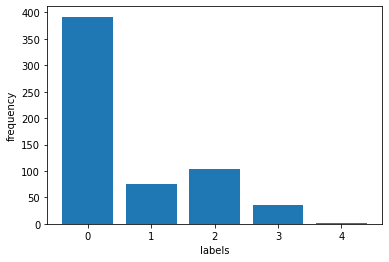

In [ ]:
# plot the class distribution histogram
import matplotlib.pyplot as plt
import numpy as np

plt.bar(x,labels,align='center') # A bar chart
plt.xlabel('labels')
plt.ylabel('frequency')

plt.show()

### Average Number of Tokens in the dataset > 512. 

(We cannot use BERT/Albert/Roberta)

In [11]:
# install and import important libraries
!pip install transformers
from transformers import BertTokenizer
import json
from tqdm.auto import tqdm
import glob
import pickle
import numpy as np

In [1]:
%cd '/content/drive/My Drive/Spotify/dataset/jsons'
!ls

/content/drive/.shortcut-targets-by-id/125/jsons
0.pkl  3.pkl  6.pkl	      document2.json  document6.json
1.pkl  4.pkl  document0.json  document3.json  document7.json
2.pkl  5.pkl  document1.json  document4.json  index


In [3]:
# define the tokeniser
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [4]:
def compute_token_length(path, k):
  with open(path) as f:
    data = json.load(f)
  lst = []
  for doc in tqdm(data):
    text = doc['contents']
    tokenized_text = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text=text))
    lst.append(len(tokenized_text))

  with open(str(k) + '.pkl', 'wb') as f_lst:
    pickle.dump(lst, f_lst)

  

In [5]:
import glob
list_paths = glob.glob('*.json')

for no, p in enumerate(list_paths):
  compute_token_length(p, no)

In [17]:
lst = []
for i in range(7):
  with open(str(i) + '.pkl', 'rb') as f_lst:
    lst_0 = pickle.load(f_lst)
    for k in lst_0:
      lst.append(k)

In [35]:
arr = np.array(lst)
print("Total docs: " + str(len(arr)))
print("Mean Length: " + str(np.mean(arr)))
lst.sort(reverse=True)
for k,i in enumerate(lst):
  if(i<=512):
    break

print(">512: " + str((k+1)/len(lst)))

Total docs: 2070971
Mean Length: 524.4976631734582
>512: 0.5997491031984513


### Analysis of the Training Set

Print out the query and the corresponding document from the training set and see if their score is justified

In [45]:
with open('/content/drive/My Drive/Spotify/dataset/spotify-podcasts-2020/training_dataset/podcasts_2020_topics_train.xml','r') as query_file:
  queries = query_file.readlines()

In [52]:
sample = samples[0]
print(sample)
info = sample.split('\t')
query_no = info[0]
episode_no = info[1]
print("Query: ")
for i in range((int(query_no) -1 )*7, (int(query_no) - 1)*7 + 7):
  print(queries[i][:-1])

print("Corresponding Document: ")

1	spotify:episode:0E2nqCXMkS218SE72APmNr	240.0	2

Query: 
<topics set="training">
<topic>
<num>1</num>
<query>coronavirus spread</query>
<type>topical</type>
<description>What were people saying about the spread of the novel coronavirus NCOV-19 in Wuhan at the end of 2019?</description>
</topic>
